In [1]:
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [4]:
!pip list

Package                                  Version
---------------------------------------- ----------
absl-py                                  2.1.0
aiofiles                                 23.2.1
aiohttp                                  3.9.5
aiosignal                                1.3.1
annotated-types                          0.7.0
anyio                                    3.7.1
asttokens                                2.4.1
astunparse                               1.6.3
async-timeout                            4.0.3
asyncer                                  0.0.2
attrs                                    23.2.0
bidict                                   0.23.1
blinker                                  1.7.0
blis                                     0.7.11
cachetools                               5.3.3
catalogue                                2.0.10
certifi                                  2024.2.2
chainlit                                 1.1.202
charset-normalizer                       3.

In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\micha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
# !pip install pydot

In [7]:

# Import library
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import json
import pickle
import numpy as np
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Dropout, Input, Embedding, LSTM, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam
from keras.utils.vis_utils import plot_model
import string
import random

# What is SGD? Stochastic Gradient Descent
# What is it for? To optimize the model
# Why use SGD? Because SGD is the most commonly used optimizer
# What are the advantages of SGD? Fast convergence speed
# What are the disadvantages of SGD? Unstable
# What is the solution to the disadvantages of SGD? Using a small learning rate
# What is a learning rate? The learning rate is a hyperparameter that determines how big a step is taken when optimizing the model
# What is a hyperparameter? Hyperparameters are parameters used to optimize the model
# What is a parameter? Parameters are variables whose values are changed by the model to optimize the model

In [8]:
# Initialize cleaner

lemmatizer=WordNetLemmatizer()
punc=string.punctuation
stop_words=stopwords.words('english')

In [9]:
# Json file
# 1.
with open("./Dataset/intents.json",encoding="utf-8") as file:
    intents=json.load(file)

# 2.
# data_file=open("intents.json").read() # return string type
# intents=json.loads(data_file)
# print(type(intents))

In [10]:
intents["intents"][0]

{'tag': 'greeting',
 'patterns': ['Hi there',
  'How are you?',
  'How are u?',
  'How are yu?',
  'Hello',
  'Helo',
  'Hw are you?',
  'How are yo?',
  'Hw ar you?',
  'Is anyone there?',
  'Hey',
  'Hola',
  'Good day',
  'Hai',
  'Hei',
  'Ello'],
 'responses': ['Hello, thanks for asking',
  'Good to see you again',
  'Hi there, how can I help?'],
 'context': ['']}

In [11]:
# function to clean
def remove_punctuation(w_list):
    return [word for word in w_list if word not in punc]

def remove_stopwords(w_list):
    return [word for word in w_list if word not in stop_words]

def remove_number(w_list):
    return [word for word in w_list if not word.isnumeric()]

def get_tag(tag):
    if tag.startswith('j'):
        return 'a'
    elif tag.startswith('v'):
        return 'v'
    elif tag.startswith('n'):
        return 'n'
    elif tag.startswith('r'):
        return 'r'
    else:
        return None

def lemmatize(w_list):
    lemmatized=[]
    tagging=pos_tag(w_list)
    for word,tag in tagging:
        tag=get_tag(tag.lower())
        if tag is None:
            lemmatized.append(word)
        else:
            lemmatized.append(lemmatizer.lemmatize(word,tag))
    return lemmatized

In [12]:
# test=word_tokenize("I am, a student")
# print(remove_punctuation(test))

In [13]:
# intents["intents"][0]

In [14]:
# Populating the lists
words=[]
classes=[]
documents=[]
for intent in intents["intents"]:
    for pattern in intent["patterns"]:
        # print("pattern: ->",pattern)
        
        # Tokenize it
        word_list=word_tokenize(pattern)
        word_list=[word.lower() for word in word_list]
        words.extend(word_list)
        
        # print(words)
        
        # Add documents
        documents.append((word_list,intent["tag"].strip()))
        
        # Add classes to class list
        if intent["tag"].strip() not in classes:
            classes.append(intent["tag"].strip())

words=remove_stopwords(words)
words=remove_punctuation(words)
words=remove_number(words)
words=lemmatize(words)

# words=sorted(set(words))

classes=sorted(set(classes))
# print(words)
print(len(documents),"Documents:",documents)
print(len(classes),"Classes:",classes)
print(len(words),"Unique lemmatized words: ",words)

952 Documents: [(['hi', 'there'], 'greeting'), (['how', 'are', 'you', '?'], 'greeting'), (['how', 'are', 'u', '?'], 'greeting'), (['how', 'are', 'yu', '?'], 'greeting'), (['hello'], 'greeting'), (['helo'], 'greeting'), (['hw', 'are', 'you', '?'], 'greeting'), (['how', 'are', 'yo', '?'], 'greeting'), (['hw', 'ar', 'you', '?'], 'greeting'), (['is', 'anyone', 'there', '?'], 'greeting'), (['hey'], 'greeting'), (['hola'], 'greeting'), (['good', 'day'], 'greeting'), (['hai'], 'greeting'), (['hei'], 'greeting'), (['ello'], 'greeting'), (['bye'], 'goodbye'), (['see', 'you', 'later'], 'goodbye'), (['goodbye'], 'goodbye'), (['nice', 'chatting', 'to', 'you', ',', 'bye'], 'goodbye'), (['till', 'next', 'time'], 'goodbye'), (['thanks'], 'thanks'), (['thank', 'you'], 'thanks'), (['that', "'s", 'helpful'], 'thanks'), (['awesome', ',', 'thanks'], 'thanks'), (['thanks', 'for', 'helping', 'me'], 'thanks'), (['woww', ',', 'thankss'], 'thanks'), ([], 'noanswer'), ([], 'noanswer'), ([], 'noanswer'), ([], 'n

In [15]:
for i,test in enumerate(classes):
    if test =="Support Vector Machine":
        print(f"{i} found")

79 found


In [16]:
with open("./Dataset/words.pkl","wb") as f:
    pickle.dump(words,f)
with open("./Dataset/classes.pkl","wb") as f:
    pickle.dump(classes,f)
with open("./Dataset/documents.pkl","wb") as f:
    pickle.dump(documents,f)

In [17]:
# Initialize training data

training=[]
output_empty=[0]*len(classes)
for doc in documents:
    
    # bag of word
    bag=[]
    
    # list of tokenized words for pattern
    pattern_words=doc[0]
    pattern_words=remove_stopwords(pattern_words)
    pattern_words=remove_punctuation(pattern_words)
    # pattern_words=remove_number(pattern_words)
    pattern_words=lemmatize(pattern_words)
    
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    output_row=output_empty.copy()
    # print(output_row)
    output_row[classes.index(doc[1])]=1
    # print(output_row)
    # print(output_row.index(1))
    # break
    
    # print(len(bag))
    # print(len(output_row))
    
    training.append([bag,output_row])

    # print(bag)
    # print(output_row)

    
    # print(training[0][0])
    # print(training[0][1])
    # break
    
# print(len(training))

# Shuffle features
random.shuffle(training)

# Cara 1
train_x=[item[0] for item in training]
train_y=[item[1] for item in training]

print(len(train_x))
print(len(train_y))


# Cara 2
# training_data=np.array(training)
# # print(training_data)

# train_x=list(training_data[:,0])
# train_y=list(training_data[:,1])

# print(train_x.shape)
# print(train_y.shape)

train_x=np.array(train_x)
train_y=np.array(train_y)

print("Training data created!")

# print("train_x:",train_x)
# print("train_y:",train_y)



952
952
Training data created!


In [18]:
train_x,len(train_x[0])

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]]),
 3281)

In [19]:
train_y,len(train_y[0])

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 256)

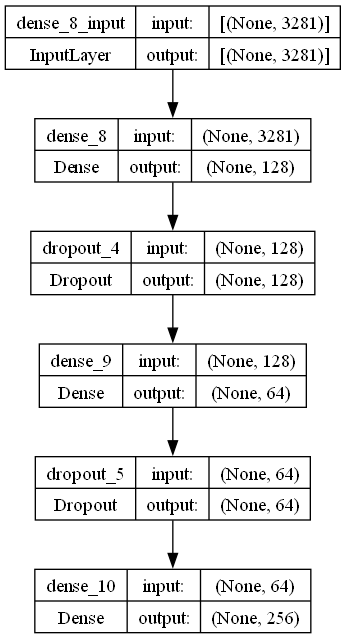

In [29]:
# Training model

# adam=Adam(learning_rate=0.001)
# rmsprop=RMSprop(learning_rate=0.001)
# adagrad=Adagrad(learning_rate=0.01)
# nadam=Nadam(learning_rate=0.001,beta_1=-0.9,beta_2=0.999)

model=Sequential()
model.add(Dense(128,input_shape=(len(train_x[0]),),activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
# model.add(Dense(32,activation="relu"))
# model.add(Dropout(0.2))
model.add(Dense(len(train_y[0]),activation='softmax'))


# sgd=SGD(learning_rate=0.01,decay=1e-6,momentum=0.5,nesterov=True)
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])
plot_model(model,show_shapes=True,show_layer_names=True)

In [30]:
hist=model.fit(train_x,train_y,epochs=100,batch_size=2,verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=15,verbose=1))
model.save("./Model/Model_Chatbot_Personal.h5",hist)

print("Model Created!")

Epoch 1/100
476/476 [==============================] - 11s 12ms/step - loss: 5.4077 - accuracy: 0.0504
Epoch 2/100
476/476 [==============================] - 6s 13ms/step - loss: 4.0177 - accuracy: 0.1964
Epoch 3/100
476/476 [==============================] - 7s 15ms/step - loss: 2.8551 - accuracy: 0.3435
Epoch 4/100
476/476 [==============================] - 1s 2ms/step - loss: 2.2270 - accuracy: 0.4349
Epoch 5/100
476/476 [==============================] - 5s 11ms/step - loss: 1.7892 - accuracy: 0.5347
Epoch 6/100
476/476 [==============================] - 6s 13ms/step - loss: 1.4892 - accuracy: 0.5966
Epoch 7/100
476/476 [==============================] - 1s 2ms/step - loss: 1.3360 - accuracy: 0.6250
Epoch 8/100
476/476 [==============================] - 12s 26ms/step - loss: 1.1363 - accuracy: 0.6481
Epoch 9/100
476/476 [==============================] - 6s 13ms/step - loss: 1.0796 - accuracy: 0.6807
Epoch 10/100
476/476 [==============================] - 5s 11ms/step - loss: 0.977

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3281)]            0         
                                                                 
 dense_11 (Dense)            (None, 128)               420096    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 256)               16640     
                                                                 
Total params: 444,992
Trainable params: 444,992
Non-trainable params: 0
_________________________________________________________________


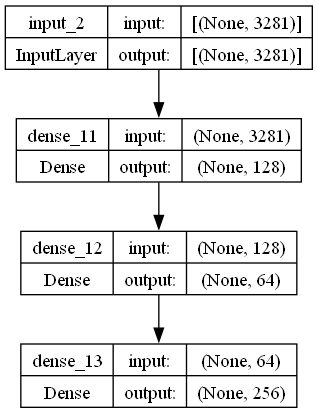

In [31]:
input_layer = Input(shape=(len(train_x[0])))
layer1 = Dense(128,activation='relu')(input_layer)
layer2 = Dense(64,activation='relu')(layer1)
output = Dense(len(train_y[0]),activation='softmax')(layer2)

# Creating the model
model = Model(inputs=input_layer,outputs=output)
model.summary()

model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=['accuracy'])
plot_model(model,show_shapes=True,show_layer_names=True)

In [32]:
hist = model.fit(train_x, train_y, epochs=100, batch_size=2, verbose=1,callbacks=tf.keras.callbacks.EarlyStopping(monitor="loss",verbose=1,patience=10))
model.save("./Model/Model_Chatbot_Personal_2.h5",hist)
print("Model Created!")

Epoch 1/100
476/476 [==============================] - 3s 6ms/step - loss: 5.1530 - accuracy: 0.0851
Epoch 2/100
476/476 [==============================] - 2s 4ms/step - loss: 3.0178 - accuracy: 0.3267
Epoch 3/100
476/476 [==============================] - 2s 5ms/step - loss: 1.7580 - accuracy: 0.5284
Epoch 4/100
476/476 [==============================] - 2s 5ms/step - loss: 1.1780 - accuracy: 0.6576
Epoch 5/100
476/476 [==============================] - 2s 4ms/step - loss: 0.8796 - accuracy: 0.7258
Epoch 6/100
476/476 [==============================] - 2s 4ms/step - loss: 0.6750 - accuracy: 0.7805
Epoch 7/100
476/476 [==============================] - 2s 4ms/step - loss: 0.5461 - accuracy: 0.8246
Epoch 8/100
476/476 [==============================] - 2s 4ms/step - loss: 0.4626 - accuracy: 0.8592
Epoch 9/100
476/476 [==============================] - 2s 5ms/step - loss: 0.4337 - accuracy: 0.8613
Epoch 10/100
476/476 [==============================] - 2s 4ms/step - loss: 0.4080 - accura

In [33]:
# !pip list

In [34]:
print(lemmatizer.lemmatize("running",pos="v"))

run


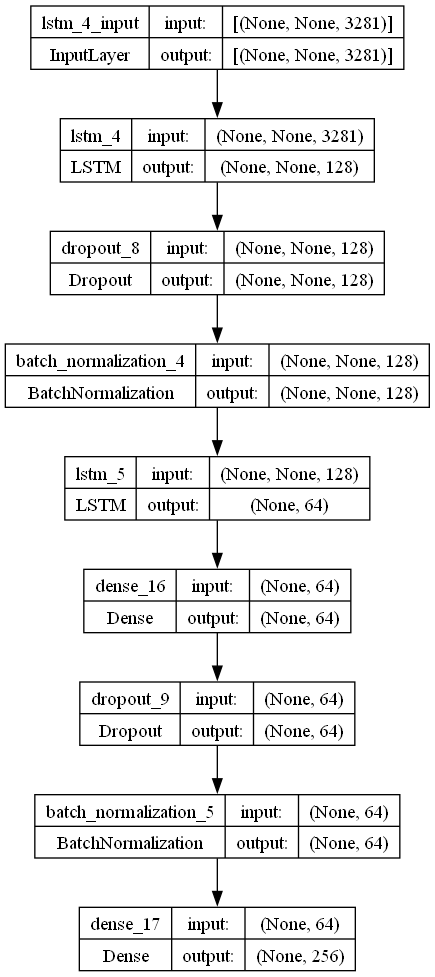

In [38]:
from keras.models import Sequential
from keras.layers import LSTM, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

model = Sequential([
    LSTM(128, input_shape=(None, train_x.shape[1]), return_sequences=True),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(len(train_y[0]), activation='softmax')
])

# adam = Adam(learning_rate=0.005)
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model,show_shapes=True,show_layer_names=True)

In [39]:
print(train_x.shape)

# Reshape X_train to match the input shape
X_train_reshaped = train_x.reshape(train_x.shape[0], 1, train_x.shape[1])
print(X_train_reshaped.shape)

early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=1)

hist = model.fit(X_train_reshaped, train_y, epochs=100, batch_size=32, verbose=1, callbacks=early_stopping)

(952, 3281)
(952, 1, 3281)
Epoch 1/100
30/30 [==============================] - 3s 32ms/step - loss: 5.4365 - accuracy: 0.0284
Epoch 2/100
30/30 [==============================] - 0s 9ms/step - loss: 4.8081 - accuracy: 0.1628
Epoch 3/100
30/30 [==============================] - 0s 7ms/step - loss: 4.3038 - accuracy: 0.2920
Epoch 4/100
30/30 [==============================] - 0s 7ms/step - loss: 3.8876 - accuracy: 0.3803
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 3.4827 - accuracy: 0.4506
Epoch 6/100
30/30 [==============================] - 0s 7ms/step - loss: 3.1230 - accuracy: 0.5137
Epoch 7/100
30/30 [==============================] - 0s 7ms/step - loss: 2.8211 - accuracy: 0.5536
Epoch 8/100
30/30 [==============================] - 0s 7ms/step - loss: 2.5056 - accuracy: 0.6113
Epoch 9/100
30/30 [==============================] - 0s 7ms/step - loss: 2.2463 - accuracy: 0.6544
Epoch 10/100
30/30 [==============================] - 0s 7ms/step - loss: 1.9987 

In [37]:
model.save("./Model/Model_Chatbot_Personal_LSTM.h5",hist)
print("Model Created!")

Model Created!
